# Problem: Marks Predictor

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [2]:
path = r"C:\Users\kishan\OneDrive - National Institute of Technology\Desktop\marks_predictor\Marks_Predictor-master\student_info.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


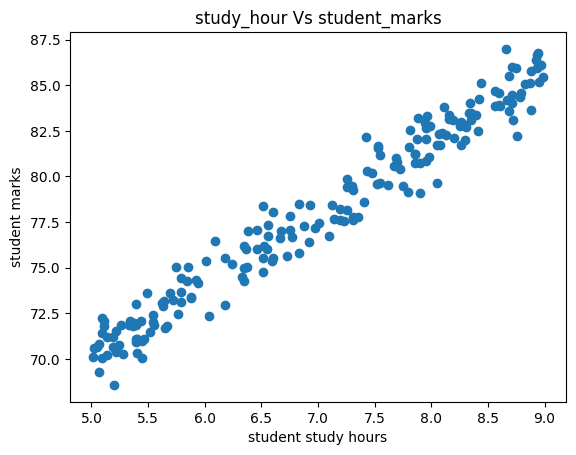

In [8]:
plt.scatter(x= df.study_hours , y= df.student_marks)
plt.xlabel("student study hours")
plt.ylabel("student marks")
plt.title("study_hour Vs student_marks")
plt.show()

# Prepare data by cleaning

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
cleanData = df.fillna(df.mean())

In [12]:
cleanData.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

# split independent & dependent variables

In [13]:
# Capital X represents matrix ans small y represents vector
X = cleanData.drop("student_marks", axis= "columns")
y = cleanData.drop("study_hours"  , axis= "columns")
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


# Divide for training and testing

In [14]:
# used function - train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=51)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


# Select a model according to Data and train it

In [15]:
# y = mX+c , my model will find value of m and c after training
# as I can see, my data is in linear form so I will use linearRegression model
from sklearn.linear_model import LinearRegression
# create an oject
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
# m value
lr.coef_

array([[3.93571802]])

In [26]:
# c value
lr.intercept_

array([50.44735504])

# Now testing model

In [18]:
y_pred = lr.predict(X_test)
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["Study hours","original marks","predicted marks"])

,Study hours,original marks,predicted marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


# Find Accuracy

In [28]:
lr.score(X_test,y_test) #score fun will find the accuracy of the model

0.9514124242154464

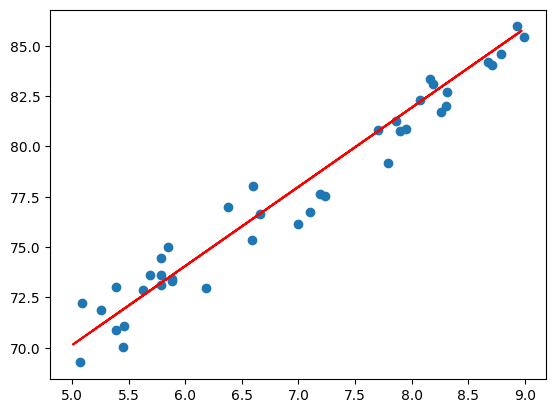

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')

#red line represents my model

# Save Model

In [21]:
import joblib
joblib.dump(lr,"my_model.pkl")

['my_model.pkl']

# Predict

In [29]:
model = joblib.load("my_model.pkl")
model.predict([[6]])[0][0].round()

C:\Users\kishan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.0